In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [3]:
img1 = cv2.imread('eiffel.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('eiffel2.jfif',cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1 ,des1 = orb.detectAndCompute(img1,None)
kp2 ,des2 = orb.detectAndCompute(img2,None)

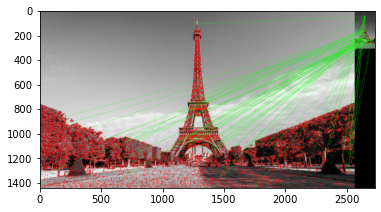

(<matplotlib.image.AxesImage at 0x1e67c708b20>, None)

In [7]:
img3 = cv2.imread('eiffel.jpg',cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('eiffel2.jfif',cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
kp1 ,des1 = sift.detectAndCompute(img3,None)
kp2 ,des2 = sift.detectAndCompute(img4,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img5 = cv2.drawMatchesKnn(img3,kp1,img4,kp2,matches,None,**draw_params)
plt.imshow(img5,),plt.show()